###  Corona vaccine progress 
version 0.90 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-03 05:21:50.846730


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,source_name,source_website,vaccines,last_observation_date
0,Argentina,ARG,Government of Argentina,https://www.argentina.gob.ar/sites/default/fil...,Sputnik V,2020-12-31
1,Austria,AUT,Federal Ministry for Social Affairs and Health,https://www.sozialministerium.at/Informationen...,Pfizer/BioNTech,2020-12-30
2,Bahrain,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2021-01-02
3,Bulgaria,BGR,Ministry of Health,https://coronavirus.bg/bg/statistika,Pfizer/BioNTech,2021-01-01
4,Canada,CAN,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada,"Moderna, Pfizer/BioNTech",2021-01-01
5,Chile,CHL,Department of Statistics and Health Information,https://deis.minsal.cl/,Pfizer/BioNTech,2020-12-27
6,China,CHN,National Health Commission,https://www.globaltimes.cn/page/202012/1211515...,"CNBG, Sinovac",2020-12-31
7,Costa Rica,CRI,Government of Costa Rica,https://www.presidencia.go.cr/comunicados/2020...,Pfizer/BioNTech,2020-12-24
8,Croatia,HRV,Ministry of Health,https://vlada.gov.hr/news/government-approves-...,Pfizer/BioNTech,2020-12-30
9,Denmark,DNK,Statens Serum Institut,https://covid19.ssi.dk/overvagningsdata/vaccin...,Pfizer/BioNTech,2021-01-02


In [5]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:15]

,location,date,vaccine,total_vaccinations,source_url,iso_code,source_name,source_website,vaccines,last_observation_date,_merge
13,Bahrain,2021-01-02,Sinopharm,60097,https://twitter.com/MOH_Bahrain/status/1345450...,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2021-01-02,both
135,United States,2021-01-02,"Moderna, Pfizer/BioNTech",4225756,https://covid.cdc.gov/covid-data-tracker/#vacc...,USA,Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,"Moderna, Pfizer/BioNTech",2021-01-02,both
68,Greece,2021-01-02,Pfizer/BioNTech,3001,https://www.moh.gov.gr/articles/ministry/grafe...,GRC,Ministry of Health,https://www.moh.gov.gr/articles/ministry/grafe...,Pfizer/BioNTech,2021-01-02,both
50,Denmark,2021-01-02,Pfizer/BioNTech,32368,https://covid19.ssi.dk/overvagningsdata/vaccin...,DNK,Statens Serum Institut,https://covid19.ssi.dk/overvagningsdata/vaccin...,Pfizer/BioNTech,2021-01-02,both
92,Italy,2021-01-02,Pfizer/BioNTech,52037,https://bit.ly/vaccini_covid19,ITA,Commissioner for the COVID-19 emergency,https://bit.ly/vaccini_covid19,Pfizer/BioNTech,2021-01-02,both
119,Romania,2021-01-02,Pfizer/BioNTech,13242,https://vaccinare-covid.gov.ro/actualizare-zil...,ROU,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...,Pfizer/BioNTech,2021-01-02,both
12,Bahrain,2021-01-01,Sinopharm,59351,https://twitter.com/MOH_Bahrain/status/1345086...,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2021-01-02,both
35,Canada,2021-01-01,"Moderna, Pfizer/BioNTech",108253,https://github.com/ishaberry/Covid19Canada/blo...,CAN,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada,"Moderna, Pfizer/BioNTech",2021-01-01,both
16,Bulgaria,2021-01-01,Pfizer/BioNTech,4739,https://coronavirus.bg/bg/statistika,BGR,Ministry of Health,https://coronavirus.bg/bg/statistika,Pfizer/BioNTech,2021-01-01,both
91,Italy,2021-01-01,Pfizer/BioNTech,45667,https://bit.ly/vaccini_covid19,ITA,Commissioner for the COVID-19 emergency,https://bit.ly/vaccini_covid19,Pfizer/BioNTech,2021-01-02,both


In [6]:
#Countries in list
allCountries["location"].value_counts()

Canada              19
Israel              13
Bahrain             11
United States        8
Denmark              7
Germany              6
Romania              5
Italy                5
Estonia              5
Mexico               5
Poland               4
Chile                4
Oman                 4
Hungary              4
Wales                3
Bulgaria             3
Northern Ireland     3
Scotland             3
United Kingdom       3
Greece               2
France               2
China                2
Portugal             2
Russia               2
England              2
Argentina            2
Iceland              1
Finland              1
Lithuania            1
Costa Rica           1
Luxembourg           1
Kuwait               1
Ireland              1
Latvia               1
Austria              1
Croatia              1
Name: location, dtype: int64

In [7]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Argentina         Sputnik V                    2
Austria           Pfizer/BioNTech              1
Bahrain           Sinopharm                   11
Bulgaria          Pfizer/BioNTech              3
Canada            Moderna, Pfizer/BioNTech     2
                  Pfizer/BioNTech             17
Chile             Pfizer/BioNTech              4
China             CNBG, Sinovac                2
Costa Rica        Pfizer/BioNTech              1
Croatia           Pfizer/BioNTech              1
Denmark           Pfizer/BioNTech              7
England           Pfizer/BioNTech              2
Estonia           Pfizer/BioNTech              5
Finland           Pfizer/BioNTech              1
France            Pfizer/BioNTech              2
Germany           Pfizer/BioNTech              6
Greece            Pfizer/BioNTech              2
Hungary           Pfizer/BioNTech              4
Iceland           Pfizer/BioNTech              1
Ireland           Pfizer/B

In [8]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 135
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               128 non-null    object        
 1   date                   128 non-null    datetime64[ns]
 2   vaccine                128 non-null    object        
 3   total_vaccinations     128 non-null    int64         
 4   source_url             128 non-null    object        
 5   iso_code               128 non-null    object        
 6   source_name            128 non-null    object        
 7   source_website         128 non-null    object        
 8   vaccines               128 non-null    object        
 9   last_observation_date  128 non-null    object        
 10  _merge                 128 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 11.2+ KB


In [9]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


11 413 375 (32, 3)


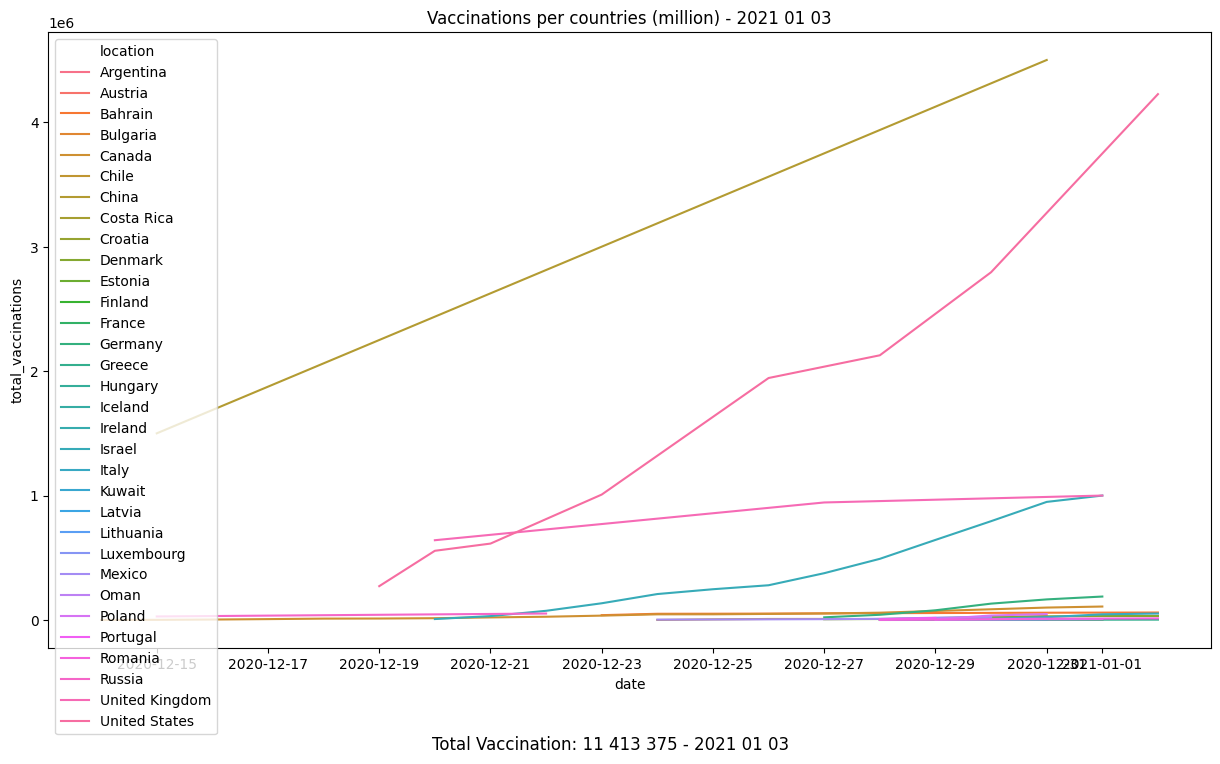

In [10]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


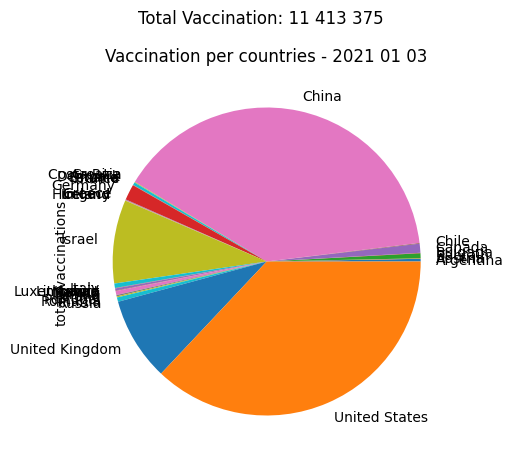

In [11]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [12]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
China,4500000,"CNBG, Sinovac",CHN
United States,4225756,"Moderna, Pfizer/BioNTech",USA
United Kingdom,1000000,Pfizer/BioNTech,GBR
Israel,1000000,Pfizer/BioNTech,ISR
Germany,188553,Pfizer/BioNTech,DEU
Canada,108253,"Moderna, Pfizer/BioNTech",CAN
Bahrain,60097,Sinopharm,BHR
Italy,52037,Pfizer/BioNTech,ITA
Russia,52000,Sputnik V,RUS


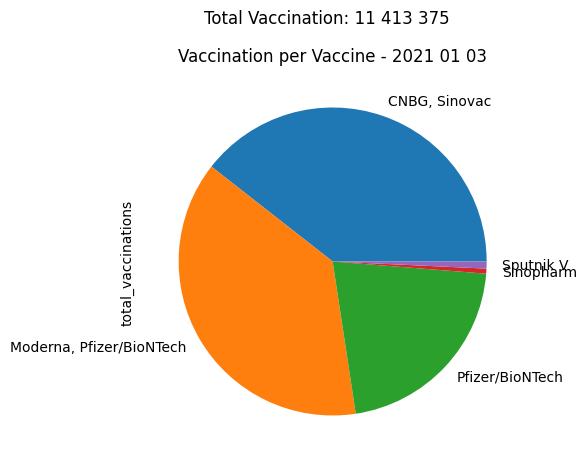

In [13]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [14]:
plotVaccine.sort_values(ascending=True)

vaccine
Sinopharm                     60097
Sputnik V                     84013
Pfizer/BioNTech             2435256
Moderna, Pfizer/BioNTech    4334009
CNBG, Sinovac               4500000
Name: total_vaccinations, dtype: int64

In [15]:
# Sweden have 10 000 doses....
#allCountries

In [16]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-03 05:22:02.528706
Time elapsed (hh:mm:ss.ms) 0:00:11.682230


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [17]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [18]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
121,http://www.wikidata.org/entity/Q826,Asia,false,Maldives,Q826,436330,MDV,11151,false,false,male
108,http://www.wikidata.org/entity/Q1039,Africa,false,São Tomé and Príncipe,Q1039,204327,STP,1921,false,false,male
103,http://www.wikidata.org/entity/Q1045,Africa,false,Somalia,Q1045,11031386,SOM,478,false,false,male
75,http://www.wikidata.org/entity/Q213,Europe,true,Czech Republic,Q213,10693939,CZE,20379,false,false,male
45,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male


In [19]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,32013,Sputnik V,ARG
Austria,6000,Pfizer/BioNTech,AUT
Bahrain,60097,Sinopharm,BHR
Bulgaria,4739,Pfizer/BioNTech,BGR
Canada,108253,"Moderna, Pfizer/BioNTech",CAN
Chile,8648,Pfizer/BioNTech,CHL
China,4500000,"CNBG, Sinovac",CHN
Costa Rica,55,Pfizer/BioNTech,CRI
Croatia,7864,Pfizer/BioNTech,HRV


In [20]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,32013,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,6000,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,60097,Sinopharm,BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,4739,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
4,108253,"Moderna, Pfizer/BioNTech",CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
5,8648,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
6,4500000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
7,55,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
8,7864,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both
9,32368,Pfizer/BioNTech,DNK,http://www.wikidata.org/entity/Q35,Europe,true,Denmark,Q35,5827463,DNK,57218,false,false,female,both


In [21]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   32 non-null     int64   
 1   vaccine              32 non-null     object  
 2   iso_code             32 non-null     object  
 3   cid                  32 non-null     object  
 4   continent            32 non-null     object  
 5   memberEU             32 non-null     int64   
 6   country              32 non-null     object  
 7   qid                  32 non-null     object  
 8   population           32 non-null     int64   
 9   ISO3166_1            32 non-null     object  
 10  nominalGDPperCapita  32 non-null     float64 
 11  G20                  32 non-null     int64   
 12  IMF                  32 non-null     int64   
 13  genderH              32 non-null     object  
 14  _merge               32 non-null     category
 15  genderFlag           32 n

In [22]:
#CountriesData

In [23]:
CountriesData['Country'] = CountriesData.index

In [24]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.357782
population                         0.825262
nominalGDPperCapita                0.060507
G20                                0.420049
IMF                               -0.078918
genderFlag                         0.125886
Country                            0.121882
vaccinations_population_percent    0.173253
Name: total_vaccinations, dtype: float64

In [25]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.173253
memberEU                          -0.326895
population                        -0.040355
nominalGDPperCapita                0.140591
G20                               -0.105697
IMF                               -0.088832
genderFlag                         0.052933
Country                            0.013065
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [26]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


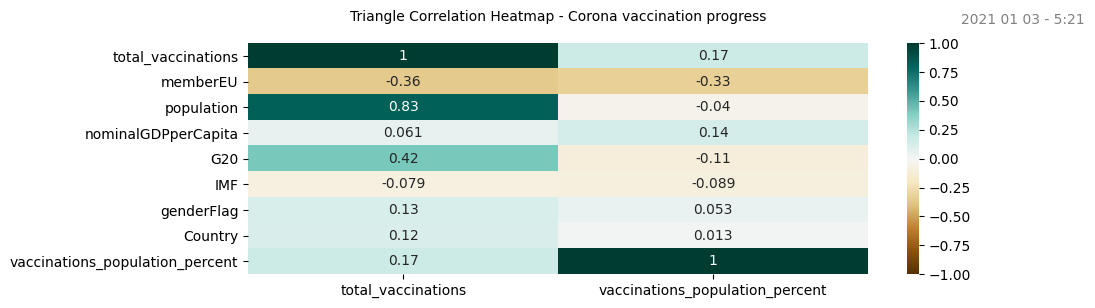

In [27]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [28]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,total_vaccinations,vaccinations_population_percent,population,G20,country,continent,memberEU,IMF
18,1000000,10.997471,9093000,0,Israel,Asia,0,0
2,60097,4.026373,1492584,0,Bahrain,Asia,0,0
30,1000000,1.514640,66022273,1,United Kingdom,Europe,0,0
16,4875,1.365355,357050,0,Iceland,Europe,0,0
31,4225756,1.287400,328239523,1,United States of America,North America,0,0
9,32368,0.555439,5827463,0,Denmark,Europe,1,0
6,4500000,0.319258,1409517397,1,People's Republic of China,Asia,0,0
4,108253,0.285667,37894799,1,Canada,North America,0,0
13,188553,0.226764,83149300,1,Germany,Europe,1,1
23,1200,0.191660,626108,0,Luxembourg,Europe,1,0


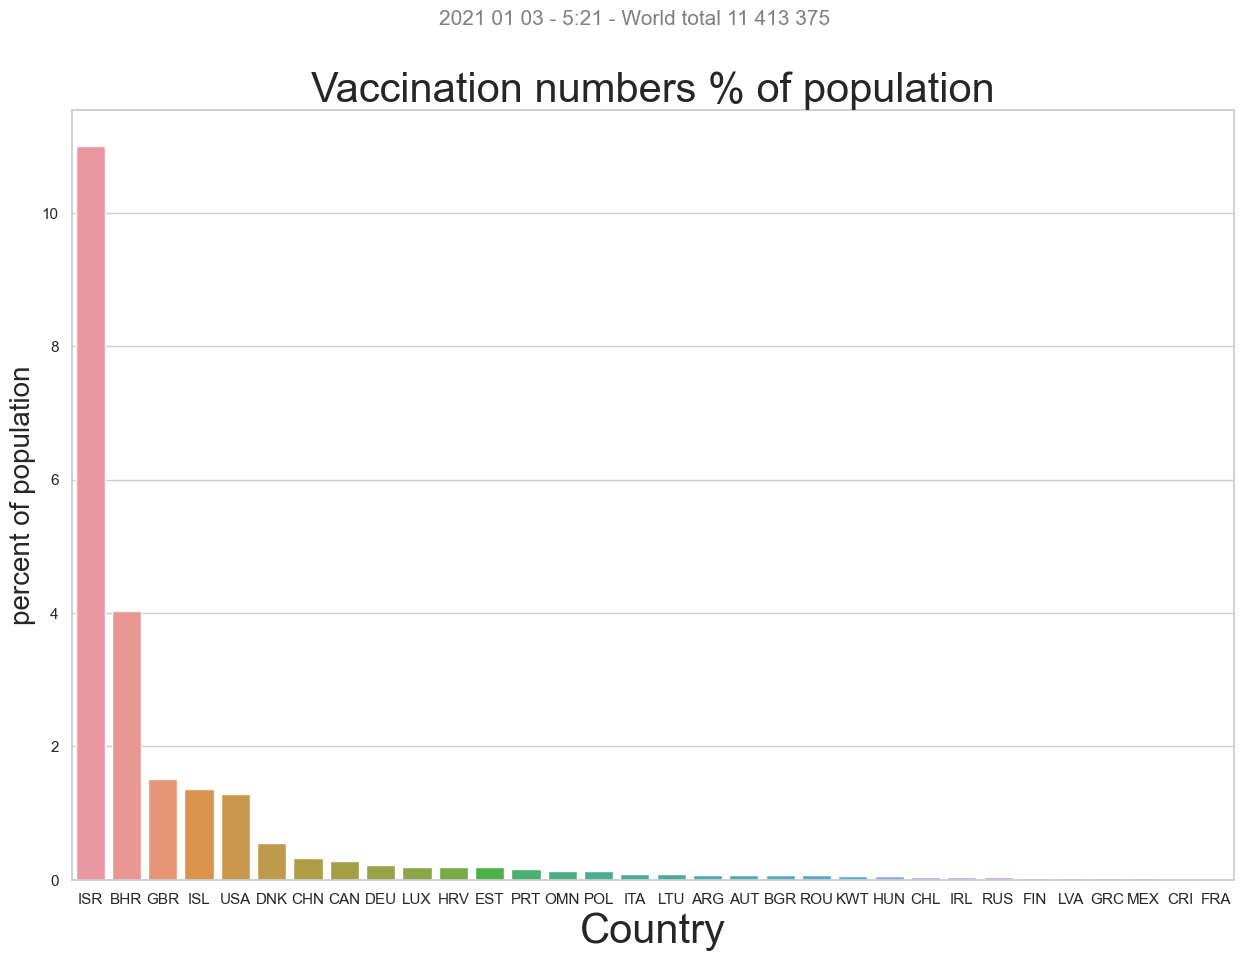

In [29]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

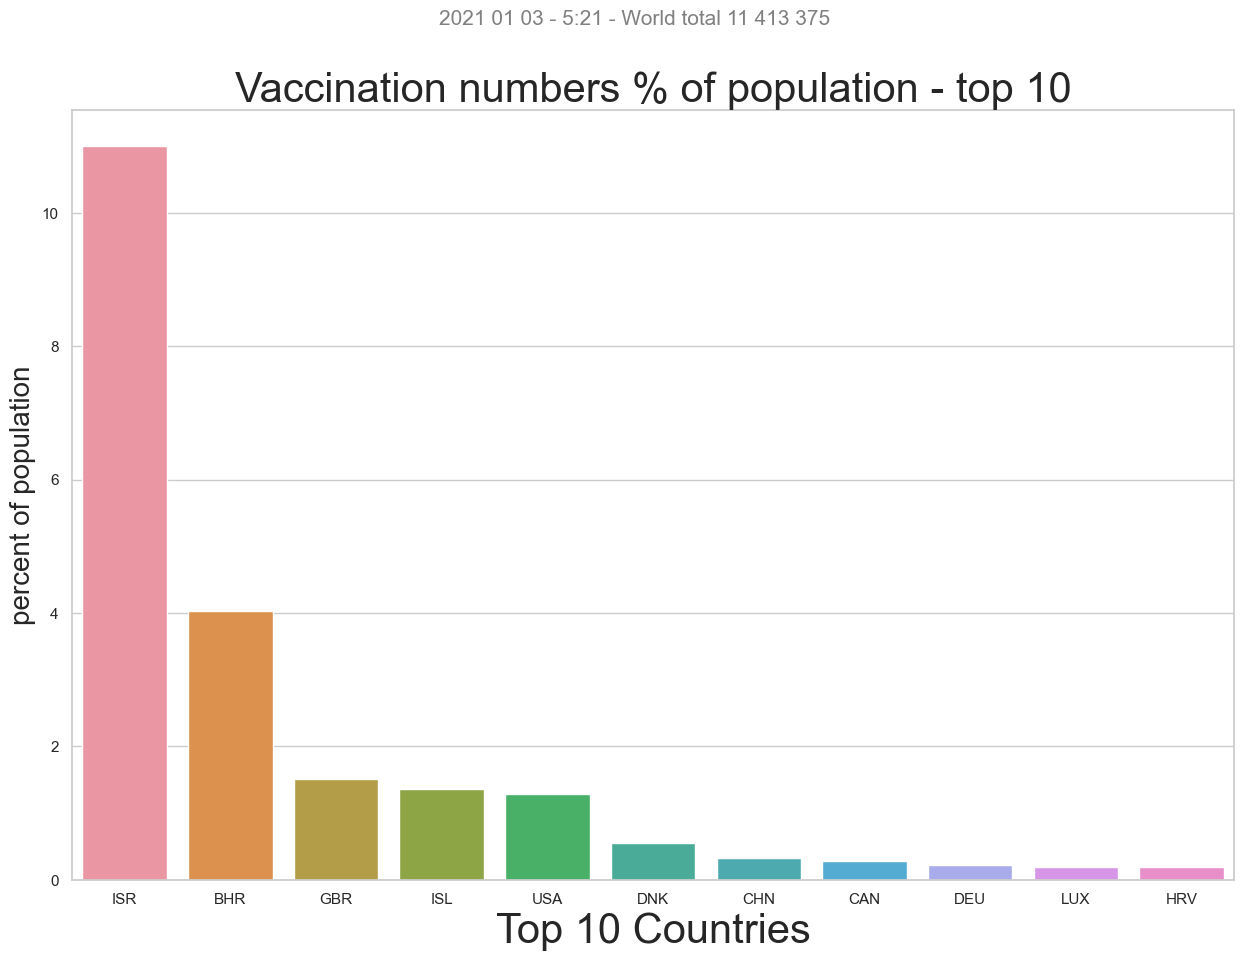

In [30]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

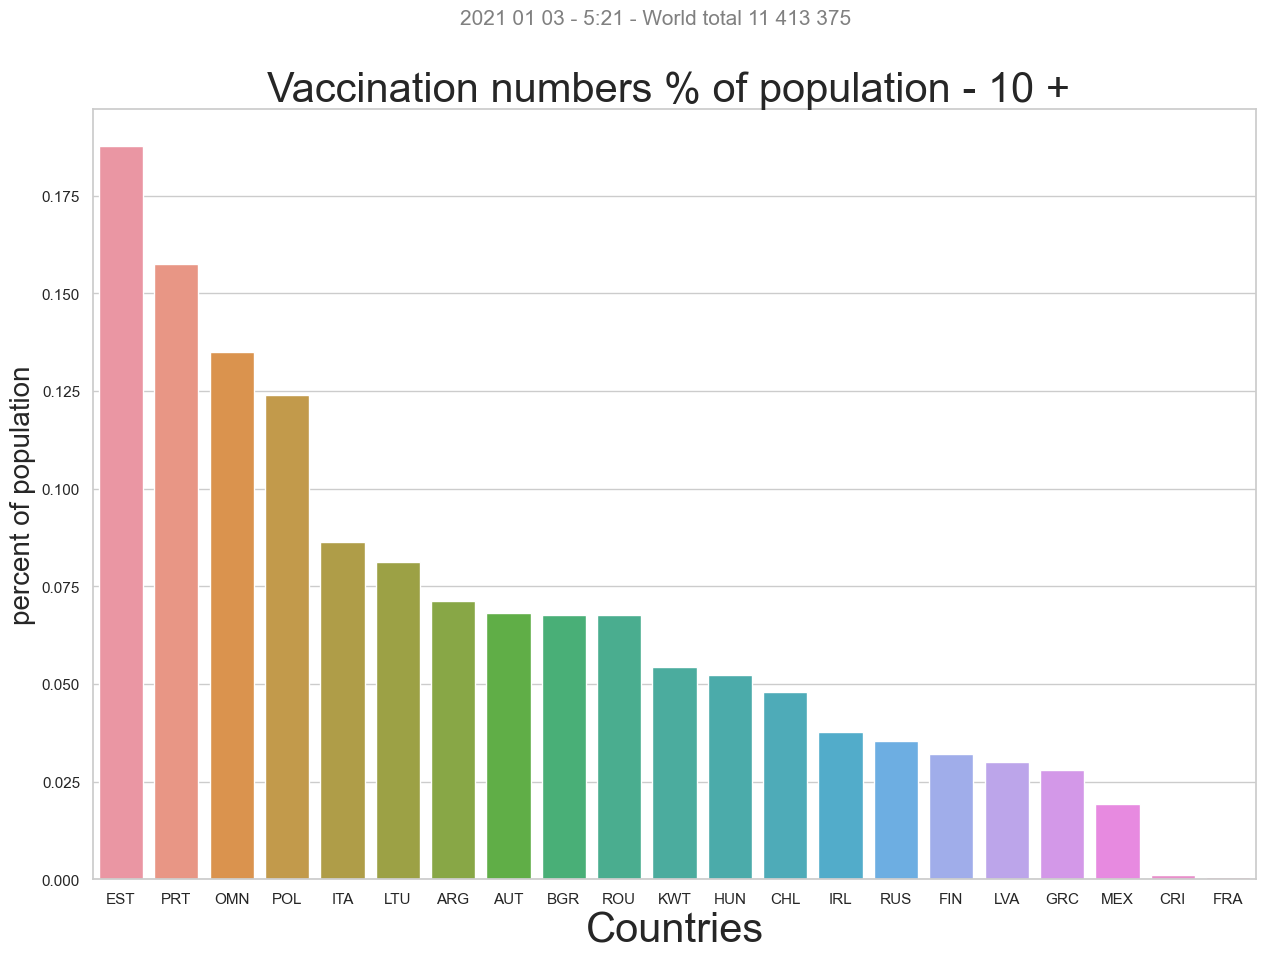

In [31]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

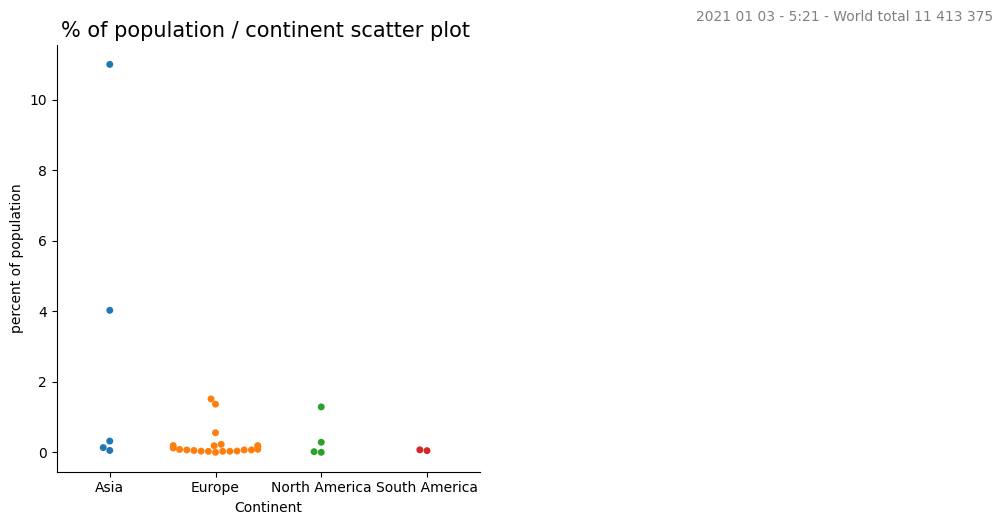

In [32]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

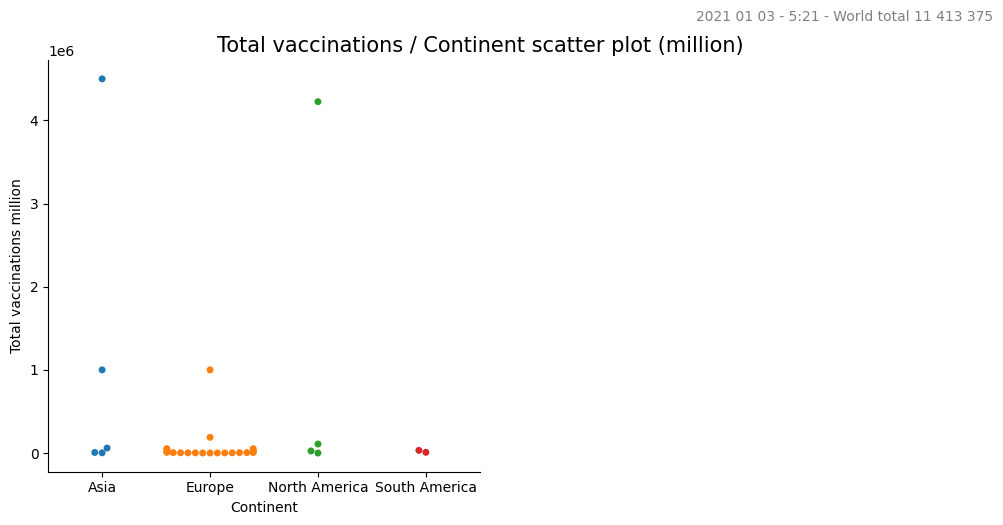

In [33]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [34]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

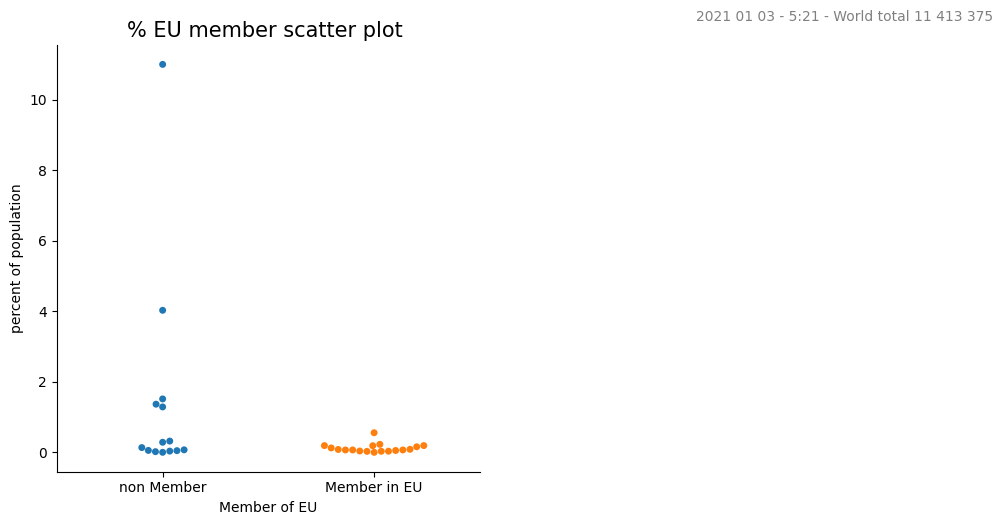

In [35]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

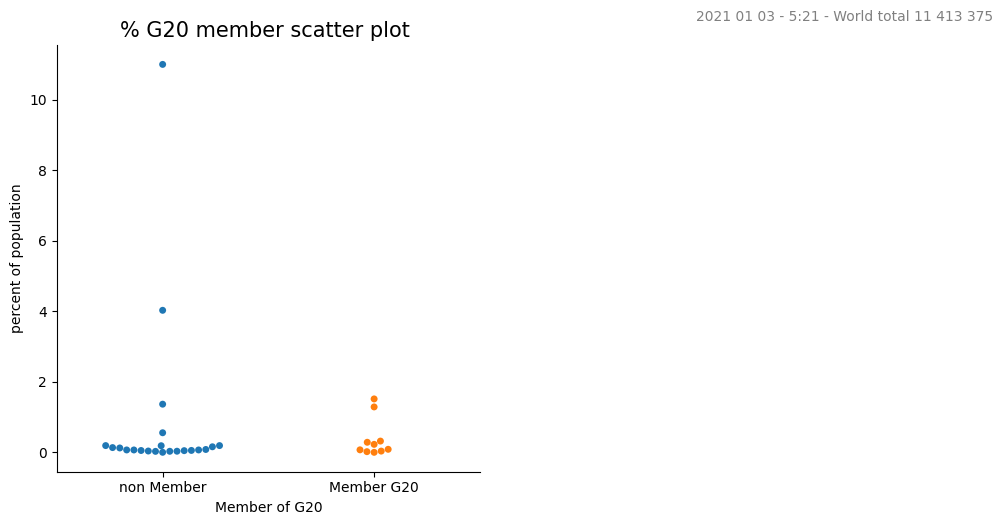

In [36]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

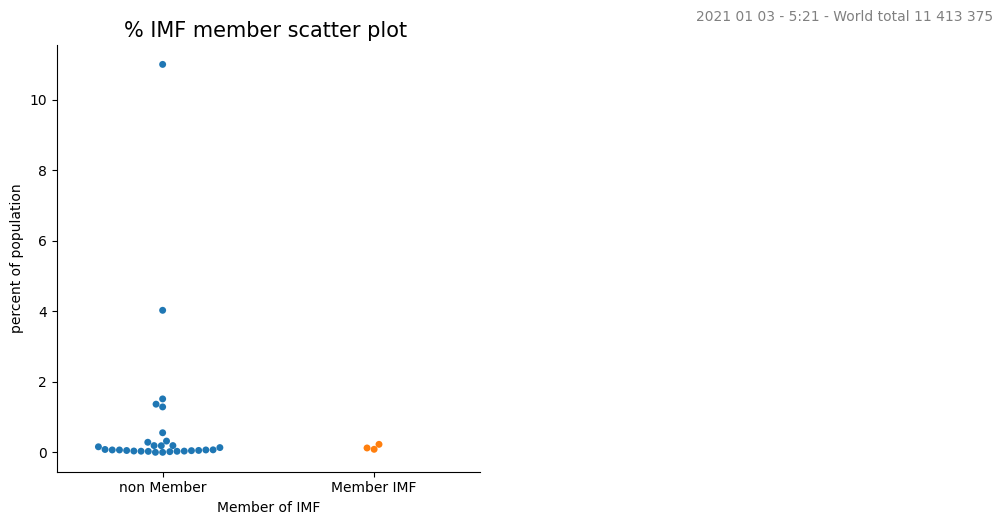

In [37]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [38]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


11 413 375 (32, 3) 1 444 539


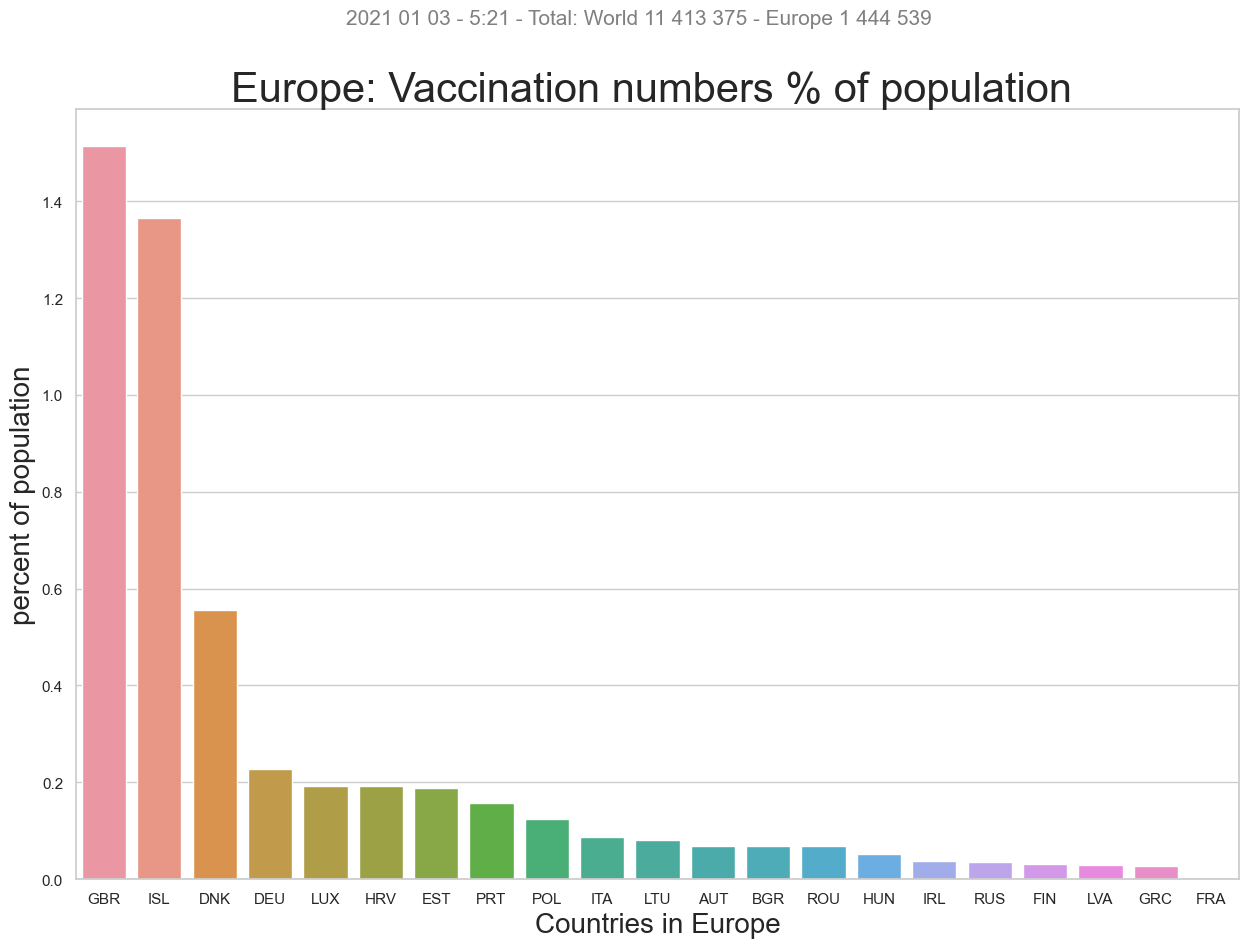

In [39]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [40]:
#CountriesDataEurope

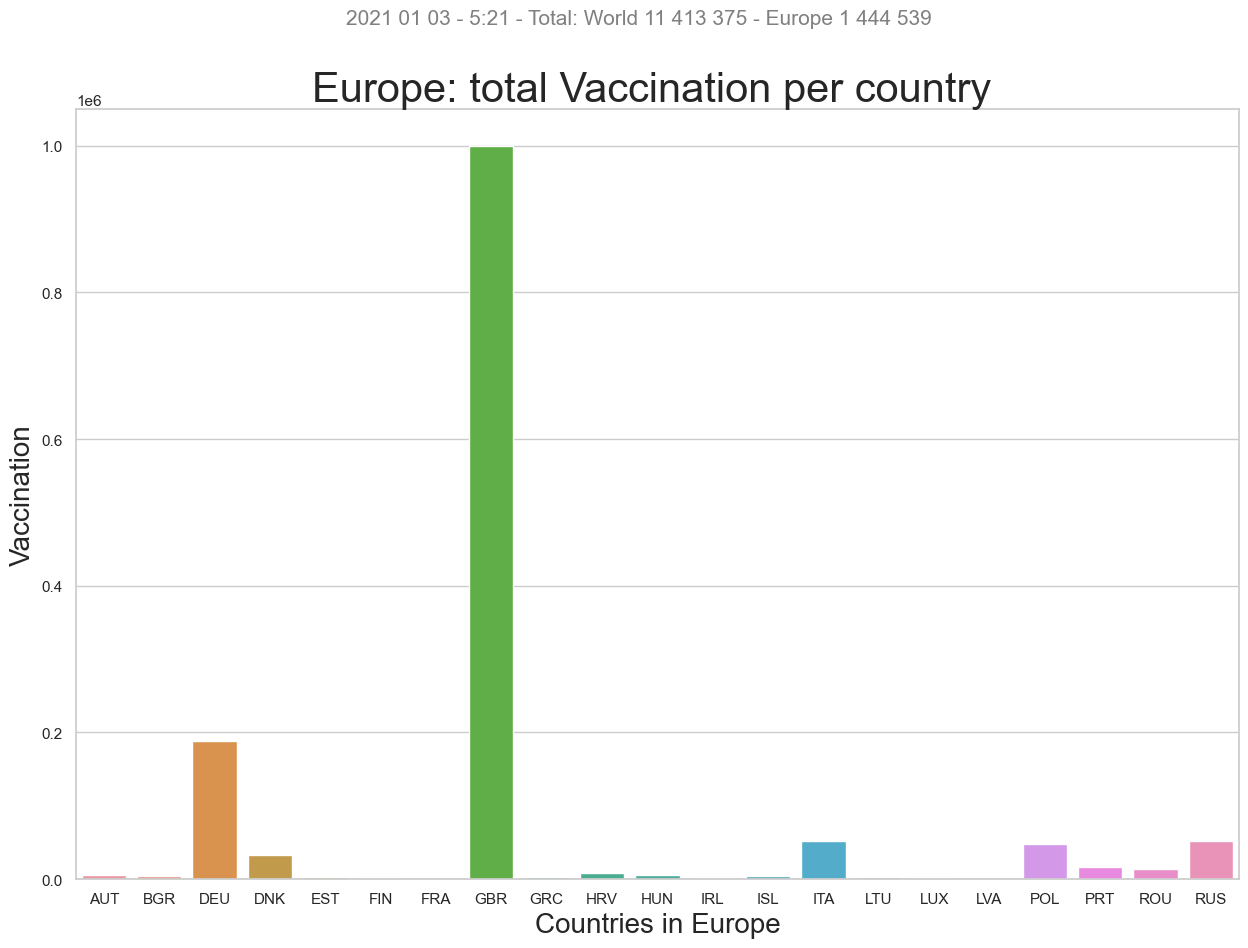

In [41]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [42]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,total_vaccinations,vaccinations_population_percent,ISO3166_1,memberEU,head_gender,country_x
13,0.0,0.000000,ALB,non Member,male,Albania
37,0.0,0.000000,AND,non Member,male,Andorra
2,0.0,0.000000,ARM,non Member,male,Armenia
35,6000.0,0.068111,AUT,Member in EU,male,Austria
6,0.0,0.000000,AZE,non Member,male,Azerbaijan
1,0.0,0.000000,BEL,Member in EU,male,Belgium
49,4739.0,0.067700,BGR,Member in EU,male,Bulgaria
9,0.0,0.000000,BIH,non Member,male,Bosnia and Herzegovina
16,0.0,0.000000,BLR,non Member,male,Belarus
30,0.0,0.000000,CHE,non Member,male,Switzerland


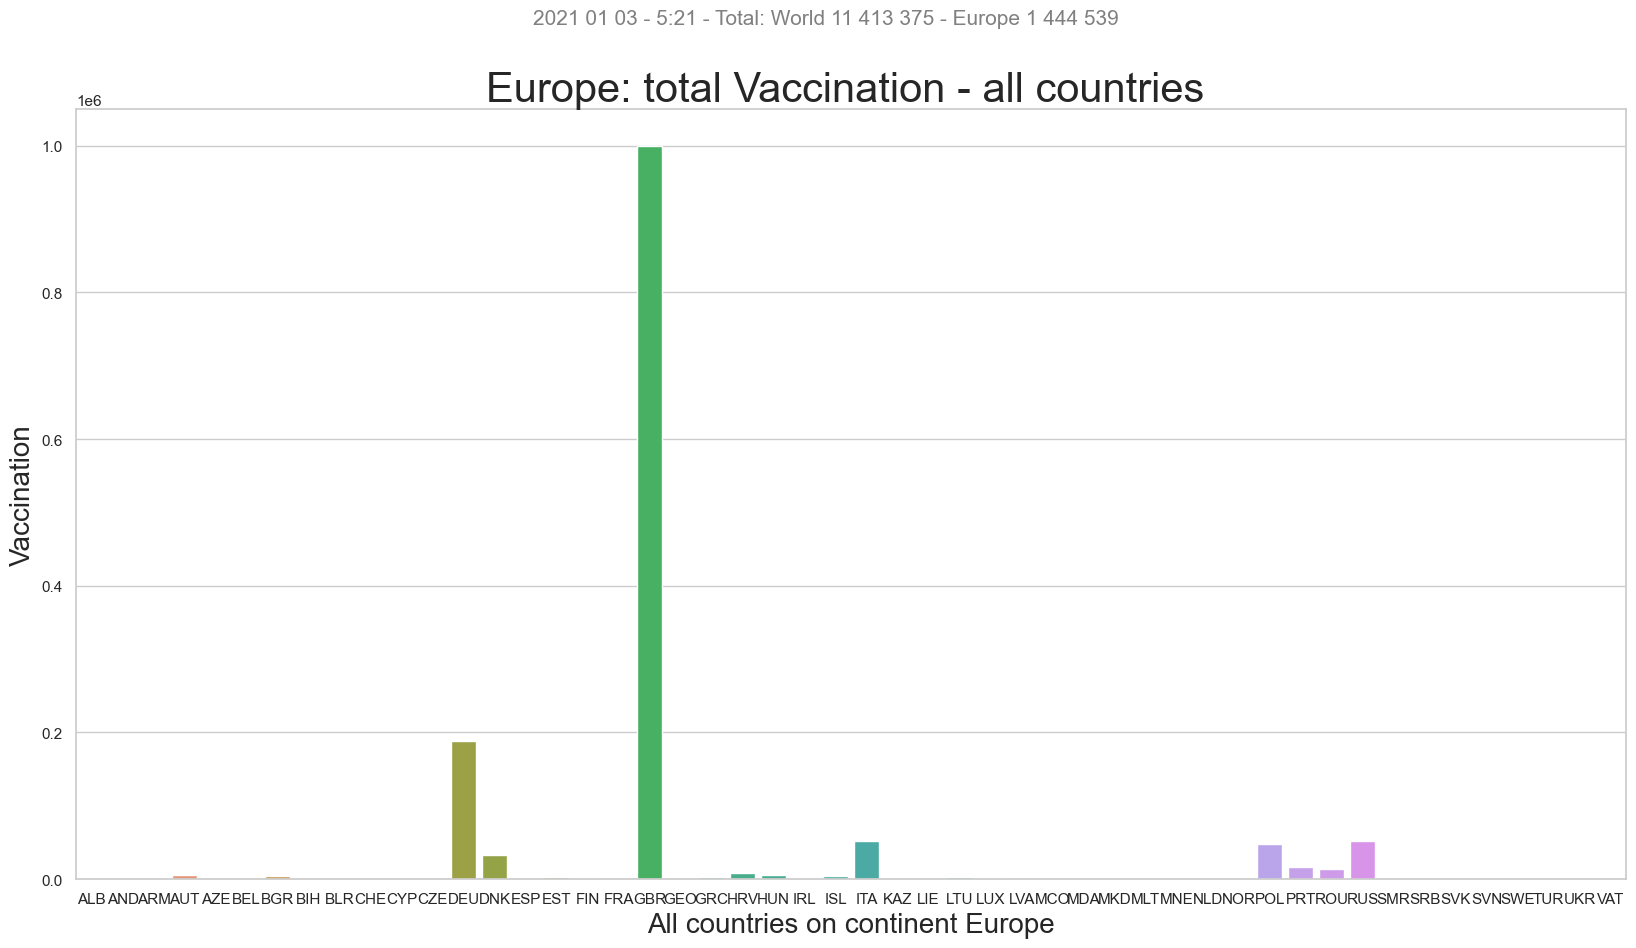

In [43]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [44]:
CountriesDataEuropeAll

,total_vaccinations,vaccinations_population_percent,ISO3166_1,memberEU,head_gender,country_x
13,0.0,0.000000,ALB,non Member,male,Albania
37,0.0,0.000000,AND,non Member,male,Andorra
2,0.0,0.000000,ARM,non Member,male,Armenia
35,6000.0,0.068111,AUT,Member in EU,male,Austria
6,0.0,0.000000,AZE,non Member,male,Azerbaijan
1,0.0,0.000000,BEL,Member in EU,male,Belgium
49,4739.0,0.067700,BGR,Member in EU,male,Bulgaria
9,0.0,0.000000,BIH,non Member,male,Bosnia and Herzegovina
16,0.0,0.000000,BLR,non Member,male,Belarus
30,0.0,0.000000,CHE,non Member,male,Switzerland


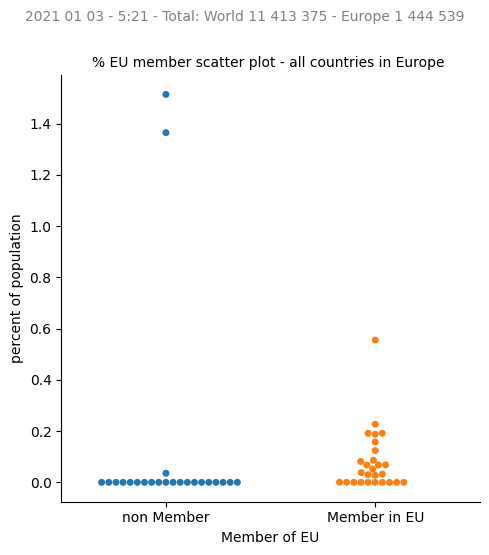

In [45]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [46]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 39
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_vaccinations               50 non-null     float64
 1   vaccinations_population_percent  50 non-null     float64
 2   ISO3166_1                        50 non-null     object 
 3   memberEU                         50 non-null     object 
 4   head_gender                      50 non-null     object 
 5   country_x                        50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [47]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

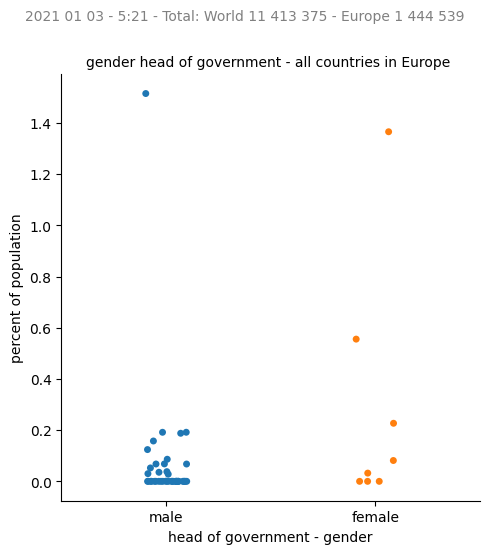

In [48]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

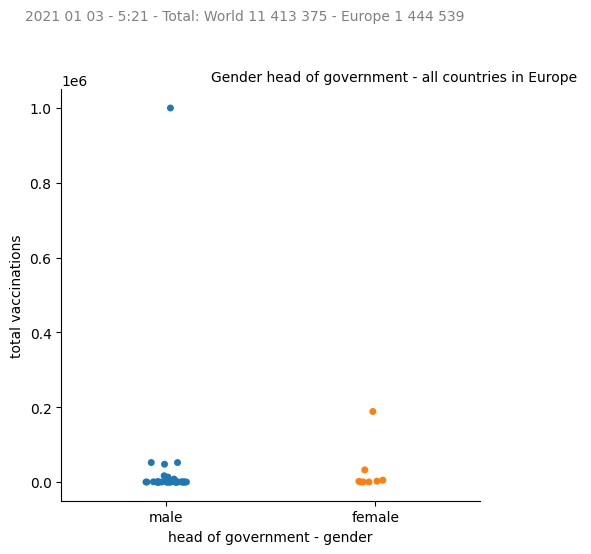

In [49]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [50]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

11 413 375 (32, 3) 1 444 539 (21, 21)


In [51]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-03 05:22:18.907273
Time elapsed (hh:mm:ss.ms) 0:00:28.060863


In [52]:
#The Global State of Democracy Indices
stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
df = pd.read_stata(stata_democracy_indices)

In [53]:
df.sample(10)

,ID,ID_country_name,ID_country_code,ID_year,ID_country_year,ID_region,ID_subregion,C_A1,L_A1,U_A1,C_SD11,L_SD11,U_SD11,C_SD12,C_SD13,L_SD13,U_SD13,C_SD14,L_SD14,U_SD14,C_A2,L_A2,U_A2,C_SD21,L_SD21,U_SD21,C_SD22,L_SD22,U_SD22,C_SD22A,L_SD22A,U_SD22A,C_SD22B,L_SD22B,U_SD22B,C_SD22C,L_SD22C,U_SD22C,C_SD22D,L_SD22D,...,v_23_36,v_23_37,v_31_01,v_31_02,v_31_03,v_31_04,v_31_05,v_32_01,v_32_02,v_32_03,v_32_04,v_32_05,v_32_06,v_33_01,v_33_02,v_33_03,v_33_04,v_33_05,v_41_01,v_41_02,v_41_03,v_41_04,v_41_05,v_42_01,v_42_02,v_42_03,v_42_04,v_42_05,v_42_06,v_51_01,v_51_02,v_51_03,v_51_04,v_51_05,v_51_06,v_52_01,v_53_01,v_53_02,v_54_01,v_54_02
7119,7120.0,East Africa,971.0,2012.0,9712012.0,NaN,East Africa,0.312379,0.247435,0.377323,0.309677,0.267407,0.351948,0.647699,0.414504,0.370207,0.458802,0.454085,0.321932,0.586239,0.453708,0.407064,0.500353,0.501335,0.471298,0.531372,0.431542,0.399301,0.463783,0.414555,0.382928,0.446182,0.419041,0.367305,0.470777,0.449068,0.380025,0.518112,0.394945,0.343876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2459,2460.0,Armenia,371.0,1991.0,3711991.0,Europe,Eastern Europe,0.650178,0.583632,0.716724,0.684605,0.643938,0.725272,0.947737,0.604164,0.562301,0.646027,0.762389,0.667030,0.857748,0.586747,0.538066,0.635429,0.586173,0.557114,0.615231,0.622004,0.590438,0.653569,0.595033,0.565643,0.624424,0.600559,0.553367,0.647752,0.538773,0.470770,0.606775,0.679615,0.623003,...,NaN,NaN,0.806437,0.388907,0.292934,0.540526,0.666667,0.425103,0.458041,0.405713,0.400569,NaN,NaN,0.675939,0.798986,0.600189,0.481866,0.0,0.449273,0.483753,0.595098,0.595507,NaN,0.663855,0.555262,0.526237,0.514847,0.376744,NaN,0.494495,0.555459,0.371144,0.263496,0.711308,0.637333,NaN,0.128041,1.000000,0.000000,0.710036
258,259.0,Jamaica,51.0,2008.0,512008.0,Latin America/Caribbean,Caribbean,0.823230,0.757808,0.888652,0.843227,0.801165,0.885289,0.963741,0.707424,0.665008,0.749839,1.000000,0.781772,1.218228,0.683195,0.635992,0.730398,0.655842,0.626172,0.685512,0.746216,0.714067,0.778365,0.682986,0.653427,0.712546,0.791784,0.748874,0.834694,0.738241,0.657063,0.819420,0.723490,0.667203,...,0.666667,0.666667,0.859474,0.715641,0.601711,0.814556,1.000000,0.743573,0.798660,0.788391,0.821487,0.361111,1.0,0.873173,0.849704,0.782568,0.758108,1.0,0.612064,0.646523,0.755826,0.606662,0.250000,0.707100,0.654664,0.639907,0.704388,0.842205,0.75,0.765178,0.631969,0.583684,0.602233,0.558039,0.547379,0.4956,0.016645,1.000000,0.982915,0.786598
2864,2865.0,Equatorial Guinea,411.0,1978.0,4111978.0,Africa,Central Africa,0.000000,-0.067907,0.067907,0.004329,-0.037149,0.045808,0.000000,0.044473,-0.015272,0.104218,0.123452,-0.020790,0.267694,0.028482,-0.018376,0.075340,0.052358,0.021835,0.082880,0.030149,-0.001418,0.061717,0.001422,-0.067639,0.070483,0.003877,-0.078440,0.086195,0.095231,0.020029,0.170432,0.080166,0.018812,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.073469,0.098596,0.077396,0.077360,NaN,NaN,0.092252,0.103804,0.036634,0.082441,0.0,0.055669,0.047525,0.117276,0.068939,NaN,0.099831,0.007785,0.049339,0.069944,0.100603,NaN,0.067474,0.093206,0.088488,0.064383,0.204803,0.156330,0.0000,0.000000,0.000000,NaN,0.124785
974,975.0,Paraguay,150.0,2004.0,1502004.0,Latin America/Caribbean,South America,0.668710,0.602339,0.735080,0.665022,0.622304,0.707740,0.889772,0.629484,0.584869,0.674100,1.000000,0.781772,1.218228,0.533696,0.487783,0.579609,0.555851,0.526110,0.585593,0.638533,0.607573,0.669493,0.590011,0.560928,0.619094,0.624722,0.573657,0.675786,0.661572,0.600161,0.722983,0.637816,0.589703,...,0.666667,0.333333,0.741160,0.543030,0.566065,0.592906,1.000000,0.492383,0.732610,0.555897,0.575490,0.333333,0.5,0.655508,0.657481,0.666193,0.433616,0.5,0.270058,0.354236,0.329424,0.266460,0.166667,0.593467,0.574725,0.471310,0.342131,0.507321,0.25,0.602863,0.501597,0.496208,0.590304,0.615077,0.391650,0.4760,0.042254,1.000000,0.988945,0.717864
4599,460